<a href="https://colab.research.google.com/github/sheha919/Cobaltocenium_project/blob/main/ml_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
set_config(display='diagram')
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

# Keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

import shap
from lime.lime_tabular import LimeTabularExplainer

## Customization Options
plt.style.use(('ggplot','tableau-colorblind10'))
sns.set_context(context='notebook', font_scale= 1.2)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['figure.facecolor']='white'

C:\Users\sheha\anaconda3\envs\dojo-env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
df=pd.read_excel('cobaltocenium_data_new.xlsx')
df.head()

,Unnamed: 0,Name,CoCp2 energy,CoCp name,CoCp energy,Cp name,Cp energy,BDE,Dipole moment,CoCp2 HOMO energy,...,CoCp H charge,Cp H charge,CoCp proton afinity,Cp proton afinity,proton afinity,CoCp polarizability,Cp polarizability,Hardness,dCOM,rCo-O
0,0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,-2113.503825,N(CH₃)₂,-1785.987408,N(CH₃)₂,-327.488954,17.233174,15.5954,-0.1803,...,0.011840,0.01184,-1.007937,-1.007937,-1.007937,27.53932,27.53932,-39.156000,3.337480,3.856084
1,1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,-2094.048389,OCH₃,-1766.531474,N(CH₃)₂,-327.488954,17.545539,14.9760,-0.1867,...,-0.015190,0.01184,-0.804721,-1.007937,-0.906329,18.01558,27.53932,-39.532500,3.314513,4.150980
2,2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,-2207.402596,O(CO)CH₃,-1879.885018,N(CH₃)₂,-327.488954,17.961810,18.7135,-0.1849,...,0.071736,0.01184,1.643441,-1.007937,0.317752,27.13368,27.53932,-37.085250,3.312872,4.065847
3,3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,-2400.122408,P(CH₃)₂,-2072.607246,N(CH₃)₂,-327.488954,16.445457,19.9044,-0.1862,...,-0.059590,0.01184,-0.035446,-1.007937,-0.521692,43.11939,27.53932,-37.744125,3.333984,4.033683
4,4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,-2417.026291,S(CH₃),-2089.514536,N(CH₃)₂,-327.488954,14.308038,14.9101,-0.1868,...,0.019722,0.01184,0.033120,-1.007937,-0.487409,27.96205,27.53932,-38.089250,3.328151,3.818543


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           903 non-null    int64  
 1   Name                 903 non-null    object 
 2   CoCp2 energy         903 non-null    float64
 3   CoCp name            903 non-null    object 
 4   CoCp energy          903 non-null    float64
 5   Cp name              903 non-null    object 
 6   Cp energy            903 non-null    float64
 7   BDE                  903 non-null    float64
 8   Dipole moment        903 non-null    float64
 9   CoCp2 HOMO energy    903 non-null    float64
 10  CoCp2 LUMO energy    903 non-null    float64
 11  CoCp HOMO energy     903 non-null    float64
 12  CoCp LUMO energy     903 non-null    float64
 13  Cp HOMO energy       903 non-null    float64
 14  Cp LUMO energy       903 non-null    float64
 15  CoCp H charge        903 non-null    flo

In [5]:
ml_df=df.copy()

In [6]:
ml_df=ml_df.drop(columns=['Unnamed: 0'], axis = 1)
ml_df.head()

,Name,CoCp2 energy,CoCp name,CoCp energy,Cp name,Cp energy,BDE,Dipole moment,CoCp2 HOMO energy,CoCp2 LUMO energy,...,CoCp H charge,Cp H charge,CoCp proton afinity,Cp proton afinity,proton afinity,CoCp polarizability,Cp polarizability,Hardness,dCOM,rCo-O
0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,-2113.503825,N(CH₃)₂,-1785.987408,N(CH₃)₂,-327.488954,17.233174,15.5954,-0.1803,-0.0555,...,0.011840,0.01184,-1.007937,-1.007937,-1.007937,27.53932,27.53932,-39.156000,3.337480,3.856084
1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,-2094.048389,OCH₃,-1766.531474,N(CH₃)₂,-327.488954,17.545539,14.9760,-0.1867,-0.0607,...,-0.015190,0.01184,-0.804721,-1.007937,-0.906329,18.01558,27.53932,-39.532500,3.314513,4.150980
2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,-2207.402596,O(CO)CH₃,-1879.885018,N(CH₃)₂,-327.488954,17.961810,18.7135,-0.1849,-0.0667,...,0.071736,0.01184,1.643441,-1.007937,0.317752,27.13368,27.53932,-37.085250,3.312872,4.065847
3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,-2400.122408,P(CH₃)₂,-2072.607246,N(CH₃)₂,-327.488954,16.445457,19.9044,-0.1862,-0.0659,...,-0.059590,0.01184,-0.035446,-1.007937,-0.521692,43.11939,27.53932,-37.744125,3.333984,4.033683
4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,-2417.026291,S(CH₃),-2089.514536,N(CH₃)₂,-327.488954,14.308038,14.9101,-0.1868,-0.0654,...,0.019722,0.01184,0.033120,-1.007937,-0.487409,27.96205,27.53932,-38.089250,3.328151,3.818543


# Filter Data

In [7]:
#BDE data greater than 3kcal/mol
drop_bde = (ml_df[ml_df['BDE']<=3])
len(drop_bde)

30

In [8]:
drop_bde['Name']

290            Co(Cp-C₂H)(Cp-CBr₃)OH
450             Co(Cp-Cl)(Cp-CBr₃)OH
479             Co(Cp-Br)(Cp-CBr₃)OH
507              Co(Cp-F)(Cp-CBr₃)OH
534      Co(Cp-(CO)NHCH₃)(Cp-CBr₃)OH
585       Co(Cp-(CO)OCH₃)(Cp-CBr₃)OH
632          Co(Cp-(CO)H)(Cp-CBr₃)OH
651        Co(Cp-(CO)F)(Cp-(CO)Cl)OH
654          Co(Cp-(CO)F)(Cp-CBr₃)OH
657           Co(Cp-(CO)F)(Cp-NO₂)OH
658        Co(Cp-(CO)F)(Cp-SOOCF₃)OH
672       Co(Cp-(CO)Cl)(Cp-(CO)Cl)OH
675         Co(Cp-(CO)Cl)(Cp-CBr₃)OH
676           Co(Cp-(CO)Cl)(Cp-CN)OH
678          Co(Cp-(CO)Cl)(Cp-NO₂)OH
679       Co(Cp-(CO)Cl)(Cp-SOOCF₃)OH
695            Co(Cp-CF₃)(Cp-CBr₃)OH
714           Co(Cp-CCl₃)(Cp-CBr₃)OH
732           Co(Cp-CBr₃)(Cp-CBr₃)OH
733             Co(Cp-CBr₃)(Cp-CN)OH
734         Co(Cp-CBr₃)(Cp-SOOCH₃)OH
735            Co(Cp-CBr₃)(Cp-NO₂)OH
736         Co(Cp-CBr₃)(Cp-SOOCF₃)OH
740        Co(Cp-CBr₃)(Cp-o-PhCF₃)OH
745    Co(Cp-CBr₃)(Cp-op-Ph(CH₃)₃)OH
752              Co(Cp-CN)(Cp-NO₂)OH
753           Co(Cp-CN)(Cp-SOOCF₃)OH
7

In [9]:
ml_df = ml_df[ml_df['BDE']>3]
len(ml_df)

873

In [10]:
ml_df.columns

Index(['Name', 'CoCp2 energy', 'CoCp name', 'CoCp energy', 'Cp name',
       'Cp energy', 'BDE', 'Dipole moment', 'CoCp2 HOMO energy',
       'CoCp2 LUMO energy', 'CoCp HOMO energy', 'CoCp LUMO energy',
       'Cp HOMO energy', 'Cp LUMO energy', 'CoCp H charge', 'Cp H charge',
       'CoCp proton afinity', 'Cp proton afinity', 'proton afinity',
       'CoCp polarizability', 'Cp polarizability', 'Hardness', 'dCOM',
       'rCo-O'],
      dtype='object')

In [11]:
frag = ml_df[['Name', 'CoCp name', 'Cp name',
       'BDE', 'CoCp2 HOMO energy',
       'CoCp2 LUMO energy', 'CoCp HOMO energy', 'CoCp LUMO energy',
       'Cp HOMO energy', 'Cp LUMO energy', 'CoCp H charge', 'Cp H charge',
       'proton afinity']]
frag.head()

,Name,CoCp name,Cp name,BDE,CoCp2 HOMO energy,CoCp2 LUMO energy,CoCp HOMO energy,CoCp LUMO energy,Cp HOMO energy,Cp LUMO energy,CoCp H charge,Cp H charge,proton afinity
0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,N(CH₃)₂,N(CH₃)₂,17.233174,-0.1803,-0.0555,-0.1787,-0.0719,-0.1594,-0.0809,0.011840,0.01184,-1.007937
1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,OCH₃,N(CH₃)₂,17.545539,-0.1867,-0.0607,-0.1935,-0.0727,-0.1594,-0.0809,-0.015190,0.01184,-0.906329
2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,O(CO)CH₃,N(CH₃)₂,17.961810,-0.1849,-0.0667,-0.2170,-0.0855,-0.1594,-0.0809,0.071736,0.01184,0.317752
3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,P(CH₃)₂,N(CH₃)₂,16.445457,-0.1862,-0.0659,-0.2133,-0.0814,-0.1594,-0.0809,-0.059590,0.01184,-0.521692
4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,S(CH₃),N(CH₃)₂,14.308038,-0.1868,-0.0654,-0.2015,-0.0817,-0.1594,-0.0809,0.019722,0.01184,-0.487409


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


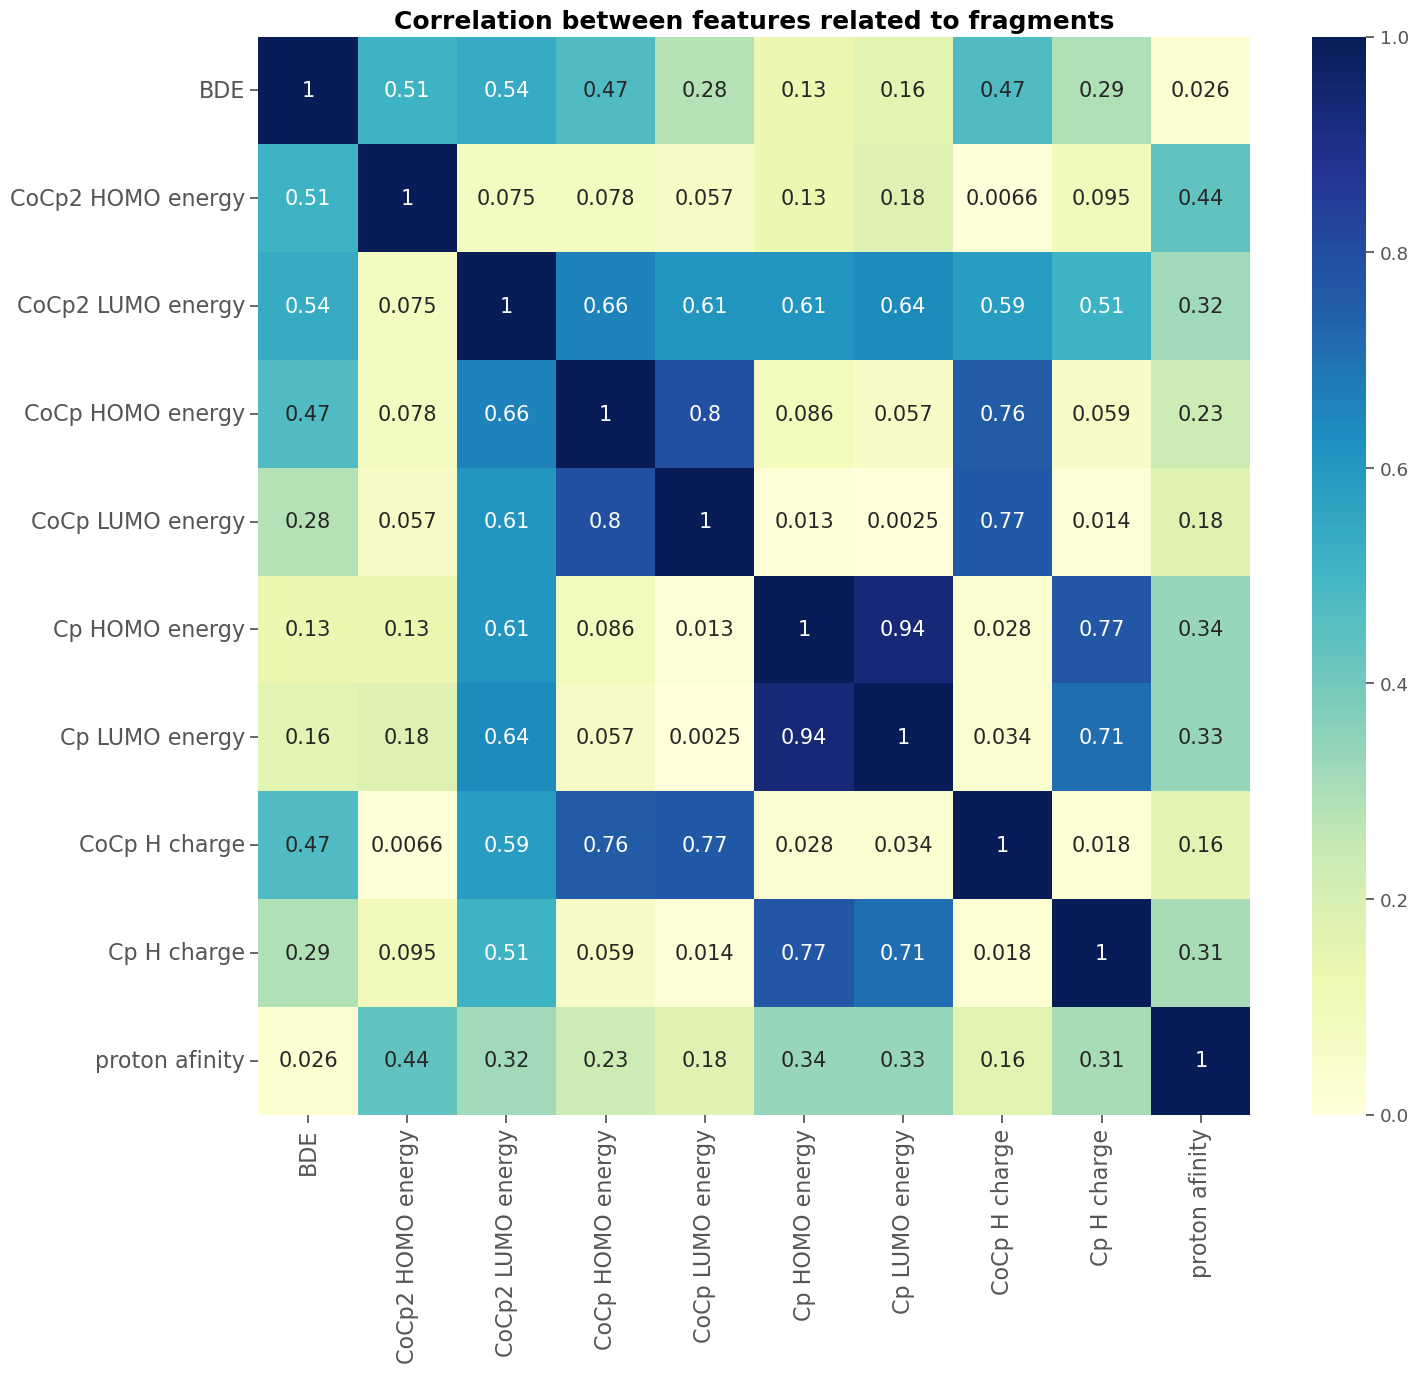

In [12]:
corr = abs(frag.corr())
plt.figure(figsize=[16,14])
sns.heatmap(corr, cmap="YlGnBu",  vmin=0.0, vmax=1.0,annot = True, annot_kws={'size': 15})
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Correlation between features related to fragments', fontsize = 18, fontweight = 'bold');

# Statistics

In [13]:
ml_df.describe()

,CoCp2 energy,CoCp energy,Cp energy,BDE,Dipole moment,CoCp2 HOMO energy,CoCp2 LUMO energy,CoCp HOMO energy,CoCp LUMO energy,Cp HOMO energy,...,CoCp H charge,Cp H charge,CoCp proton afinity,Cp proton afinity,proton afinity,CoCp polarizability,Cp polarizability,Hardness,dCOM,rCo-O
count,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,...,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000
mean,-2885.015296,-2078.544199,-806.446835,15.224432,16.170617,-0.191159,-0.086005,-0.214888,-0.085469,-0.200897,...,0.034738,0.020129,0.093671,-0.098474,-0.002402,32.582851,48.667438,-32.992052,3.300790,4.008424
std,1343.930437,778.250606,1106.634781,6.629545,3.231558,0.006312,0.011437,0.013198,0.008885,0.021833,...,0.062240,0.050861,0.906066,0.761596,0.602642,29.889890,33.700939,3.965526,0.010104,0.159475
min,-10408.735637,-9411.126546,-7952.631083,3.185810,4.493000,-0.223500,-0.118800,-0.237800,-0.106800,-0.246900,...,-0.081960,-0.081960,-1.328051,-1.328051,-1.328051,0.265420,0.265420,-46.529125,3.282637,3.691918
25%,-2880.695616,-2220.117477,-768.161154,10.742214,14.038600,-0.191500,-0.093000,-0.224500,-0.092000,-0.216600,...,-0.024960,-0.015190,-0.418594,-0.562946,-0.402361,12.952910,22.669890,-35.328250,3.292941,3.896393
50%,-2567.428016,-1879.885018,-542.529457,14.245329,16.331700,-0.190000,-0.084900,-0.213300,-0.085100,-0.201000,...,0.038080,0.011965,0.000000,-0.162356,-0.147902,24.041310,52.745580,-33.100625,3.298622,3.994029
75%,-2283.371861,-1766.531474,-397.996994,18.345363,18.211100,-0.188400,-0.078200,-0.204500,-0.079400,-0.188600,...,0.081263,0.057107,0.000000,0.000000,0.317752,43.981350,60.200450,-30.465125,3.305980,4.104762
max,-1845.520993,-1652.003971,-193.474683,42.413274,27.728700,-0.180300,-0.054800,-0.171600,-0.063300,-0.155200,...,0.160449,0.160449,2.356224,2.356224,2.356224,150.643000,150.643000,-22.935125,3.337480,4.725310


In [14]:
#checking for duplicates
ml_df.duplicated().sum()

0

In [15]:
#checking for missing values
ml_df.isna().sum().sum()

0

In [16]:
ml_df.head()

,Name,CoCp2 energy,CoCp name,CoCp energy,Cp name,Cp energy,BDE,Dipole moment,CoCp2 HOMO energy,CoCp2 LUMO energy,...,CoCp H charge,Cp H charge,CoCp proton afinity,Cp proton afinity,proton afinity,CoCp polarizability,Cp polarizability,Hardness,dCOM,rCo-O
0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,-2113.503825,N(CH₃)₂,-1785.987408,N(CH₃)₂,-327.488954,17.233174,15.5954,-0.1803,-0.0555,...,0.011840,0.01184,-1.007937,-1.007937,-1.007937,27.53932,27.53932,-39.156000,3.337480,3.856084
1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,-2094.048389,OCH₃,-1766.531474,N(CH₃)₂,-327.488954,17.545539,14.9760,-0.1867,-0.0607,...,-0.015190,0.01184,-0.804721,-1.007937,-0.906329,18.01558,27.53932,-39.532500,3.314513,4.150980
2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,-2207.402596,O(CO)CH₃,-1879.885018,N(CH₃)₂,-327.488954,17.961810,18.7135,-0.1849,-0.0667,...,0.071736,0.01184,1.643441,-1.007937,0.317752,27.13368,27.53932,-37.085250,3.312872,4.065847
3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,-2400.122408,P(CH₃)₂,-2072.607246,N(CH₃)₂,-327.488954,16.445457,19.9044,-0.1862,-0.0659,...,-0.059590,0.01184,-0.035446,-1.007937,-0.521692,43.11939,27.53932,-37.744125,3.333984,4.033683
4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,-2417.026291,S(CH₃),-2089.514536,N(CH₃)₂,-327.488954,14.308038,14.9101,-0.1868,-0.0654,...,0.019722,0.01184,0.033120,-1.007937,-0.487409,27.96205,27.53932,-38.089250,3.328151,3.818543


In [17]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 0 to 902
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 873 non-null    object 
 1   CoCp2 energy         873 non-null    float64
 2   CoCp name            873 non-null    object 
 3   CoCp energy          873 non-null    float64
 4   Cp name              873 non-null    object 
 5   Cp energy            873 non-null    float64
 6   BDE                  873 non-null    float64
 7   Dipole moment        873 non-null    float64
 8   CoCp2 HOMO energy    873 non-null    float64
 9   CoCp2 LUMO energy    873 non-null    float64
 10  CoCp HOMO energy     873 non-null    float64
 11  CoCp LUMO energy     873 non-null    float64
 12  Cp HOMO energy       873 non-null    float64
 13  Cp LUMO energy       873 non-null    float64
 14  CoCp H charge        873 non-null    float64
 15  Cp H charge          873 non-null    flo

# Validate Split

In [18]:
y = ml_df['BDE']
X = ml_df[['CoCp HOMO energy', 'CoCp LUMO energy',
           'Cp HOMO energy', 'Cp LUMO energy',
           'CoCp H charge', 'Cp H charge',
           'proton afinity']]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state = 42)

In [19]:
X_train

,CoCp HOMO energy,CoCp LUMO energy,Cp HOMO energy,Cp LUMO energy,CoCp H charge,Cp H charge,proton afinity
549,-0.2192,-0.0863,-0.1552,-0.0768,0.031767,-0.081960,0.691849
399,-0.2009,-0.0945,-0.2027,-0.1250,-0.033870,0.024095,-0.719515
794,-0.2350,-0.1068,-0.1815,-0.1118,0.160449,-0.041080,-0.341997
313,-0.2053,-0.0778,-0.2190,-0.1256,-0.024960,0.083209,0.083276
327,-0.2053,-0.0778,-0.2435,-0.1513,-0.024960,0.160449,0.083276
...,...,...,...,...,...,...,...
106,-0.2297,-0.0944,-0.2092,-0.1170,0.156189,0.071736,0.821720
270,-0.2003,-0.0802,-0.1552,-0.0768,0.008470,-0.081960,-0.676826
890,-0.2060,-0.0794,-0.1552,-0.0768,-0.042140,-0.081960,0.194416
436,-0.2131,-0.0789,-0.1952,-0.1163,-0.050620,-0.040350,-0.574160


# Functions

## Evaluvation

In [20]:
#function for evaluation
def eval_model(pipe, X_train=X_train, y_train=y_train, X_test=X_test , y_test= y_test):
  eval_results = pd.DataFrame(columns = ['Metrics','Train Score', 'Test Score'])
  train_mae = mean_absolute_error(y_train, pipe.predict(X_train))
  test_mae = mean_absolute_error(y_test, pipe.predict(X_test))

  train_mse = mean_squared_error(y_train, pipe.predict(X_train))
  test_mse = mean_squared_error(y_test, pipe.predict(X_test))

  train_rmse = np.sqrt(train_mse)
  test_rmse = np.sqrt(test_mse)

  train_r2 = r2_score(y_train, pipe.predict(X_train))
  test_r2 = r2_score(y_test, pipe.predict(X_test))

  eval_results.loc[1, 'Metrics'] = 'MAE'
  eval_results.loc[2, 'Metrics'] = 'MSE'
  eval_results.loc[3, 'Metrics'] = 'RMSE'
  eval_results.loc[4, 'Metrics'] = 'R2'

  eval_results.loc[1, 'Train Score'] = train_mae
  eval_results.loc[2, 'Train Score'] = train_mse
  eval_results.loc[3, 'Train Score'] = train_rmse
  eval_results.loc[4, 'Train Score'] = train_r2

  eval_results.loc[1, 'Test Score'] = test_mae
  eval_results.loc[2, 'Test Score'] = test_mse
  eval_results.loc[3, 'Test Score'] = test_rmse
  eval_results.loc[4, 'Test Score'] = test_r2

  return eval_results

In [21]:
#function for final evaluation
def eval_model_final(pipe, 
                     X_train=X_train, y_train=y_train, 
                     X_test=X_test , y_test= y_test):

  train_mse = mean_squared_error(y_train, pipe.predict(X_train))
  test_mse = mean_squared_error(y_test, pipe.predict(X_test))

  train_rmse = np.sqrt(train_mse)
  test_rmse = np.sqrt(test_mse)

  train_r2 = r2_score(y_train, pipe.predict(X_train))
  test_r2 = r2_score(y_test, pipe.predict(X_test))

  return (round(train_r2,6), round(test_r2,6), round(train_rmse,6), round(test_rmse,6))

## Plot

In [22]:
def train_test_plot(model_name, pipe,  X_train=X_train, y_train=y_train, X_test=X_test , y_test= y_test):
  fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(12,4))
#subplot1
  ax = sns.regplot(x = y_train, 
                   y = pipe.predict(X_train), 
                   line_kws = {'color':'black', 'ls': ':', 'label' :f'R$^2$ = {round(r2_score(y_train, pipe.predict(X_train)), 6)}'}, 
                   ax=axes[0],
                   )
  axes[0].set_title('Train Data', fontweight = 'bold')
  axes[0].set_xlabel('Actual BDE (kcal/mol)')
  axes[0].set_ylabel('Predicted BDE (kcal/mol)');

#subplot2
  ax = sns.regplot(x = y_test, 
                   y = pipe.predict(X_test), 
                   line_kws = {'color':'black', 'ls': ':', 
                   'label' : f'R$^2$ = {round(r2_score(y_test, pipe.predict(X_test)), 6)}'}, 
                   ax=axes[1])
  axes[1].set_title('Test Data', fontweight = 'bold')
  axes[1].set_xlabel('Actual BDE (kcal/mol)')
  axes[1].set_ylabel('Predicted BDE (kcal/mol)')
  
  fig.suptitle(f'Train and Test Results of {model_name}', fontsize = 20, fontweight = 'bold', y = 1.1)
  [ax.legend() for ax in axes];
  return (fig, axes)

# Data Preprocessing

## Instantiate colimn transformers

In [23]:
scaler = StandardScaler()

# Linear Regression Model

In [24]:
lr = LinearRegression()
lr_pipe = make_pipeline(scaler, lr)
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [25]:
#evaluvation of linear rigression
eval_model(lr_pipe)

,Metrics,Train Score,Test Score
1,MAE,3.073565,3.27928
2,MSE,21.656467,24.534136
3,RMSE,4.653651,4.953194
4,R2,0.513101,0.410086


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

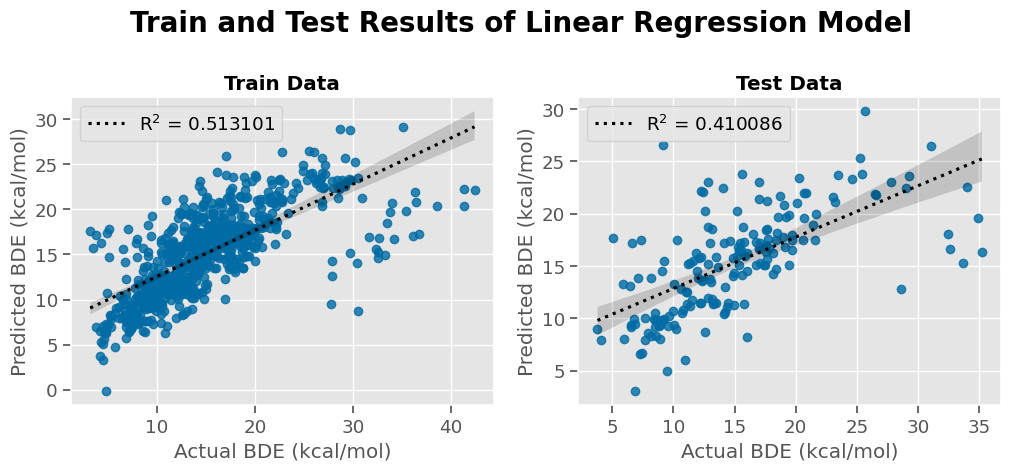

In [26]:
train_test_plot('Linear Regression Model', lr_pipe)

# Decision Tree Model

In [27]:
dt = DecisionTreeRegressor(random_state = 42)
dt_pipe = make_pipeline(scaler, dt)
dt_pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [28]:
#evaluvation of initial decision tree
eval_model(dt_pipe)

,Metrics,Train Score,Test Score
1,MAE,0.0,2.385571
2,MSE,0.0,22.694798
3,RMSE,0.0,4.763906
4,R2,1.0,0.454312


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

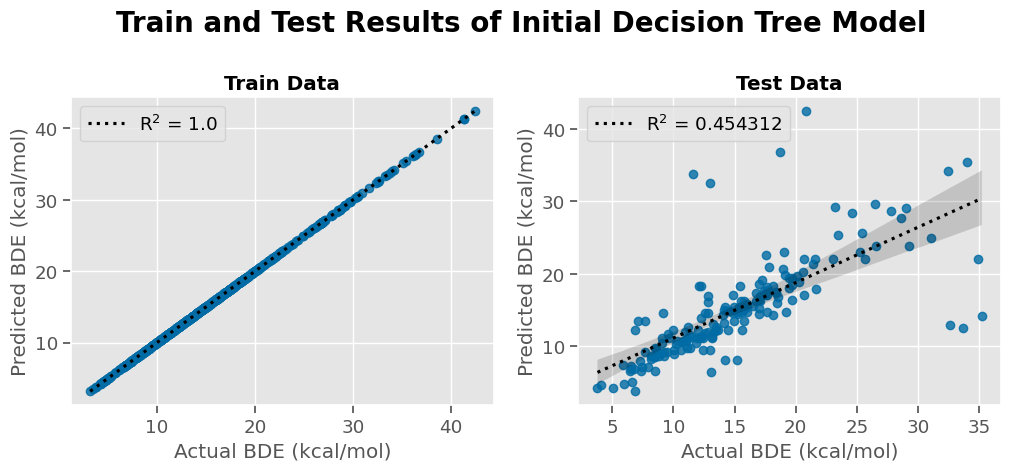

In [29]:
train_test_plot('Initial Decision Tree Model', dt_pipe)

# Bagged Tree Model

In [30]:
bt = BaggingRegressor(random_state = 42)
bt_pipe = make_pipeline(scaler, bt)
bt_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingregressor', BaggingRegressor(random_state=42))])

In [31]:
#evaluvation of initial bagged tree
eval_model(bt_pipe)

,Metrics,Train Score,Test Score
1,MAE,0.71105,1.850905
2,MSE,1.560548,10.887736
3,RMSE,1.249219,3.299657
4,R2,0.964914,0.738209


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

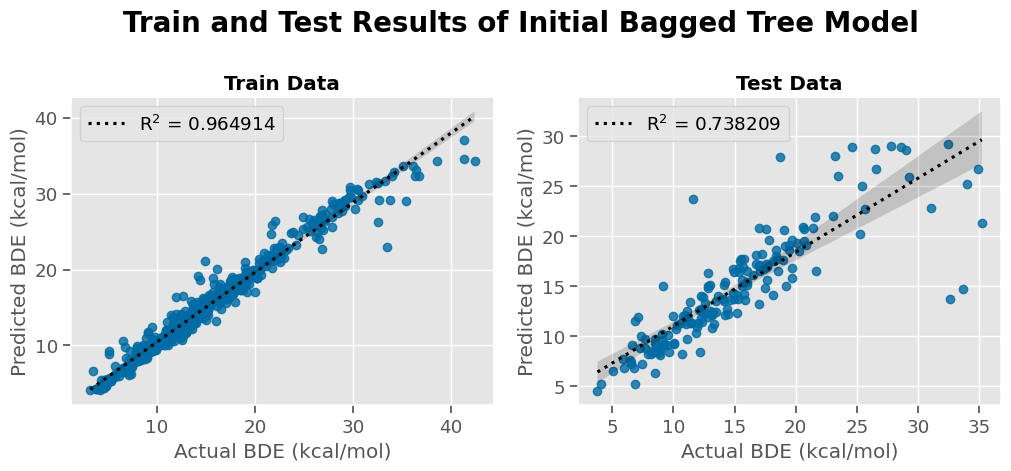

In [32]:
train_test_plot('Initial Bagged Tree Model', bt_pipe)

# K-Nearest Neighbors Model

In [33]:
knn = KNeighborsRegressor()
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [34]:
#evaluvation of initial knn
eval_model(knn_pipe)

,Metrics,Train Score,Test Score
1,MAE,2.126984,2.878028
2,MSE,12.48802,22.558776
3,RMSE,3.533839,4.749608
4,R2,0.719234,0.457583


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

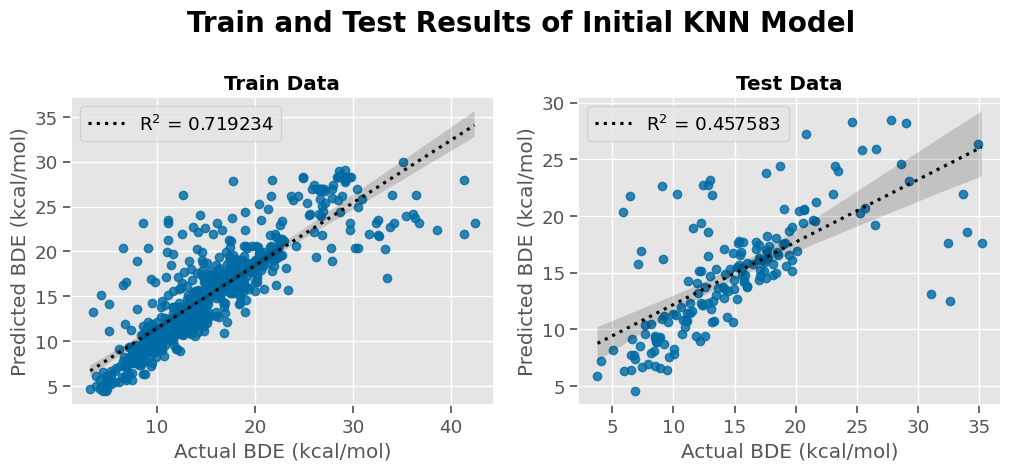

In [35]:
train_test_plot('Initial KNN Model', knn_pipe)

# Random Forest Model

In [36]:
rf = RandomForestRegressor(random_state= 42)
rf_pipe = make_pipeline(scaler, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [37]:
#evaluvation of initial bagged tree
eval_model(rf_pipe)

,Metrics,Train Score,Test Score
1,MAE,0.592754,1.742168
2,MSE,0.959752,8.586476
3,RMSE,0.979669,2.930269
4,R2,0.978422,0.793542


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

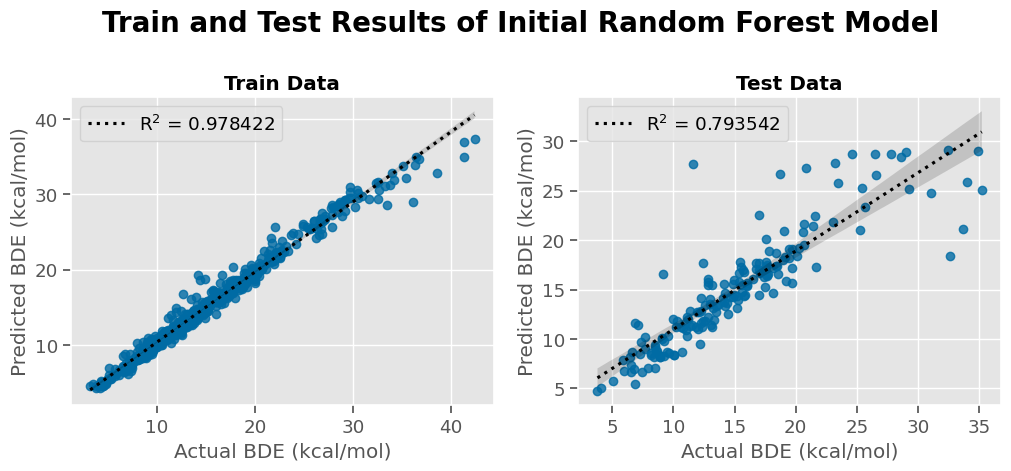

In [38]:
train_test_plot('Initial Random Forest Model', rf_pipe)

# Support Vector Regression Model

In [39]:
svg = SVR()
svg_pipe = make_pipeline(scaler, svg)
svg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())])

In [40]:
#evaluvation of initial svg
eval_model(svg_pipe)

,Metrics,Train Score,Test Score
1,MAE,2.639039,2.862807
2,MSE,21.127706,22.428709
3,RMSE,4.596488,4.735896
4,R2,0.524989,0.46071


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

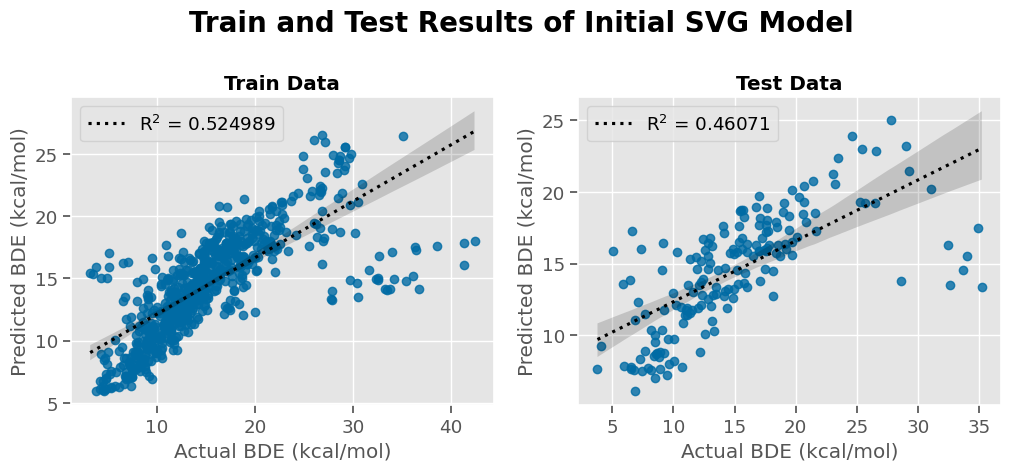

In [41]:
train_test_plot('Initial SVG Model', svg_pipe)

# XG Boost

In [42]:
xgb = XGBRegressor(random_state= 42)
xgb_pipe = make_pipeline(scaler, xgb)
xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_delta_step=0,
                              max_depth=6, min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=12, num_parallel_tree=1, predictor='auto',
                              random_state=42, reg_alpha=0, reg_lambda=1,
                              scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [43]:
#evaluvation of initial xgb
eval_model(xgb_pipe)

,Metrics,Train Score,Test Score
1,MAE,0.096573,1.519793
2,MSE,0.017283,8.655608
3,RMSE,0.131464,2.942041
4,R2,0.999611,0.791879


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

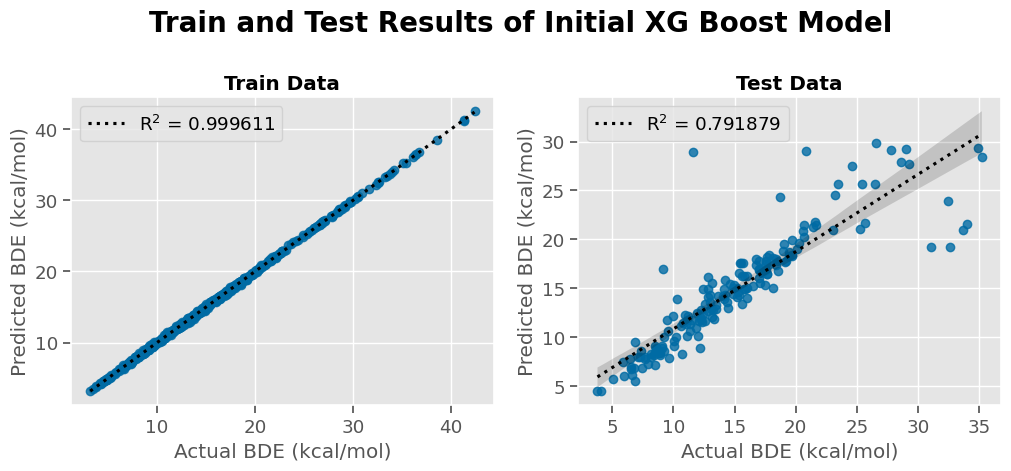

In [44]:
train_test_plot('Initial XG Boost Model', xgb_pipe)

# Evaluvation of initial models

In [45]:
model = ['Linear Regression', 'Decision Tree', 'Bagged Tree', 'KNN', 'Random Forest', 'SVG', 'XG Boost']
pipe = [lr_pipe, dt_pipe, bt_pipe, knn_pipe, rf_pipe, svg_pipe, xgb_pipe]
final_eval_results = pd.DataFrame(columns = ['Model','Train R2', 'Test R2', 'Train RMSE (kcal/mol)', 'Test RMSE (kcal/mol)'])

for i in range(len(model)):
  final_eval_results.loc[i, 'Model'] = model[i]
  final_eval_results.loc[i,'Train R2'], final_eval_results.loc[i,'Test R2'], final_eval_results.loc[i,'Train RMSE (kcal/mol)'], final_eval_results.loc[i,'Test RMSE (kcal/mol)'] = eval_model_final(pipe[i])

In [46]:
final_eval_results.set_index('Model', inplace = True) 
final_eval_results

,Train R2,Test R2,Train RMSE (kcal/mol),Test RMSE (kcal/mol)
Model,,,,
Linear Regression,0.513101,0.410086,4.653651,4.953194
Decision Tree,1.0,0.454312,0.0,4.763906
Bagged Tree,0.964914,0.738209,1.249219,3.299657
KNN,0.719234,0.457583,3.533839,4.749608
Random Forest,0.978422,0.793542,0.979669,2.930269
SVG,0.524989,0.46071,4.596488,4.735896
XG Boost,0.999611,0.791879,0.131464,2.942041


- According to the train and test RMSE values for the models;
  - all models have overfilling issue and decision tree has the highest overfittin problem.
- Out of these 7 models, XG boost, random forest and bagged tree are selected based on the test R$^2$ score to do further optimizations.


# Tunning Hyperparametrs and cross validation of models

## For XG Boost

In [47]:
#parametrs of XG boost model
xgb_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('xgbregressor',
   XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
                gamma=0, gpu_id=-1, importance_type=None,
                interaction_constraints='', learning_rate=0.300000012,
                max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=100, n_jobs=12,
                num_parallel_tree=1, predictor='auto', random_state=42,
                reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
                tree_method='exact', validate_parameters=1, verbosity=None))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'xgbregressor': XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1,

In [48]:
xgb_param_grid = {'xgbregressor__max_depth': [3,4,5],
                 'xgbregressor__learning_rate':[0.26],
                  'xgbregressor__n_estimators':[125]
                 }

In [49]:
xgb_pipe_gs = GridSearchCV(xgb_pipe, xgb_param_grid, cv=5)
xgb_pipe_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('xgbregressor',
                                        XGBRegressor(base_score=0.5,
                                                     booster='gbtree',
                                                     colsample_bylevel=1,
                                                     colsample_bynode=1,
                                                     colsample_bytree=1,
                                                     enable_categorical=False,
                                                     gamma=0, gpu_id=-1,
                                                     importance_type=None,
                                                     interaction_constraints='',
                                                     learning_rate=0.300000012,
                                                     max_delta_step=0,
                                                     max_depth=6,
                                                     min_c...
                                                     missing=nan,
                                                     monotone_constraints='()',
                                                     n_estimators=100,
                                                     n_jobs=12,
                                                     num_parallel_tree=1,
                                                     predictor='auto',
                                                     random_state=42,
                                                     reg_alpha=0, reg_lambda=1,
                                                     scale_pos_weight=1,
                                                     subsample=1,
                                                     tree_method='exact',
                                                     validate_parameters=1,
                                                     verbosity=None))]),
             param_grid={'xgbregressor__learning_rate': [0.26],
                         'xgbregressor__max_depth': [3, 4, 5],
                         'xgbregressor__n_estimators': [125]})

In [50]:
print(f'Best parameters: {xgb_pipe_gs.best_params_}')

Best parameters: {'xgbregressor__learning_rate': 0.26, 'xgbregressor__max_depth': 3, 'xgbregressor__n_estimators': 125}


In [51]:
xgb_opt = xgb_pipe_gs.best_estimator_
xgb_opt.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, enable_categorical=False,
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='', learning_rate=0.26,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=125, n_jobs=12, num_parallel_tree=1,
                              predictor='auto', random_state=42, reg_alpha=0,
                              reg_lambda=1, scale_pos_weight=1, subsample=1,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [52]:
eval_model(xgb_opt)

,Metrics,Train Score,Test Score
1,MAE,0.614595,1.388901
2,MSE,0.735453,8.810584
3,RMSE,0.857586,2.968263
4,R2,0.983465,0.788153


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

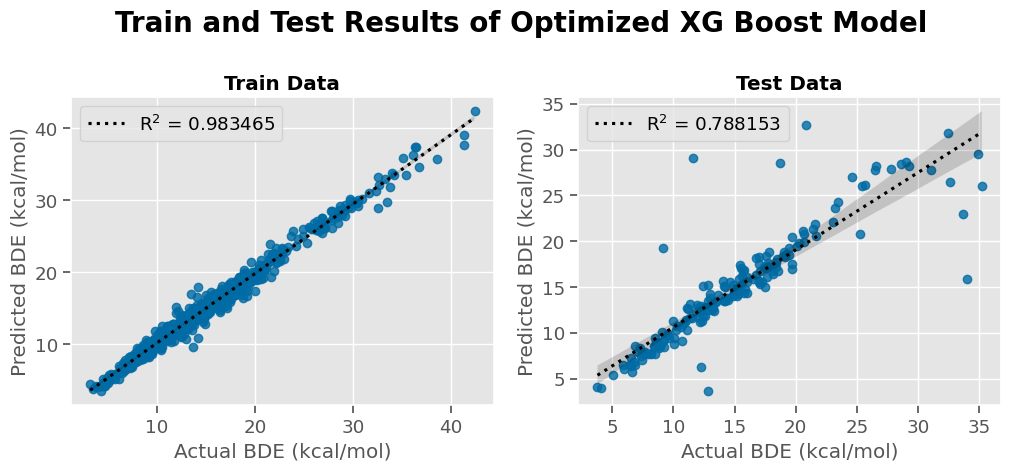

In [53]:
train_test_plot('Optimized XG Boost Model', xgb_opt)
#plt.savefig('xgb_opt.png')

## For Random Forest

In [54]:
#parametrs of random forest model
rf_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestregressor', RandomForestRegressor(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestregressor': RandomForestRegressor(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 1.0,
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__oob_

In [55]:
#maximum max_depth value of estimators of rf 
est_depth = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depth)

27

In [56]:
rf_param_grid = {'randomforestregressor__n_estimators':[25,50,75,100,125,150,175,200],
                 'randomforestregressor__max_depth': range(5, 50, 5)}

In [57]:
rf_pipe_gs = GridSearchCV(rf_pipe, rf_param_grid, cv =5)
rf_pipe_gs.fit(X_train, y_train);


In [58]:
print(f'Best parameters: {rf_pipe_gs.best_params_}')

Best parameters: {'randomforestregressor__max_depth': 15, 'randomforestregressor__n_estimators': 150}


In [59]:
rf_opt = rf_pipe_gs.best_estimator_
rf_opt.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=15, n_estimators=150,
                                       random_state=42))])

In [60]:
eval_model(rf_opt)

,Metrics,Train Score,Test Score
1,MAE,0.606784,1.745083
2,MSE,0.994426,8.647691
3,RMSE,0.997209,2.940696
4,R2,0.977642,0.79207


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

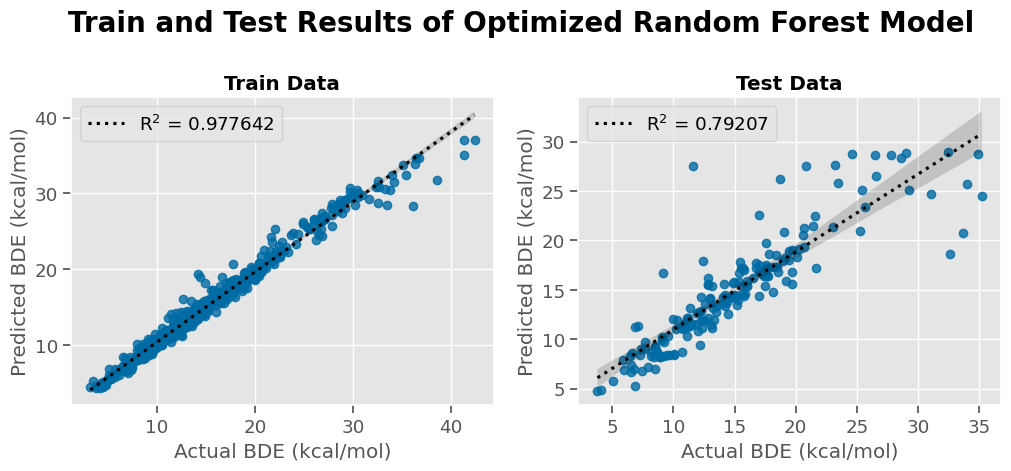

In [61]:
train_test_plot('Optimized Random Forest Model', rf_opt)
#plt.savefig('rt_opt.png')

## For Bagged Tree

In [62]:
#parametrs of decision tree model
bt_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('baggingregressor', BaggingRegressor(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'baggingregressor': BaggingRegressor(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'baggingregressor__base_estimator': None,
 'baggingregressor__bootstrap': True,
 'baggingregressor__bootstrap_features': False,
 'baggingregressor__max_features': 1.0,
 'baggingregressor__max_samples': 1.0,
 'baggingregressor__n_estimators': 10,
 'baggingregressor__n_jobs': None,
 'baggingregressor__oob_score': False,
 'baggingregressor__random_state': 42,
 'baggingregressor__verbose': 0,
 'baggingregressor__warm_start': False}

In [63]:
bt_param_grid = {'baggingregressor__n_estimators':range(10, 80, 10)}

In [64]:
bt_pipe_gs = GridSearchCV(bt_pipe, bt_param_grid, cv=5)
bt_pipe_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('baggingregressor',
                                        BaggingRegressor(random_state=42))]),
             param_grid={'baggingregressor__n_estimators': range(10, 80, 10)})

In [65]:
print(f'Best parameters: {bt_pipe_gs.best_params_}')

Best parameters: {'baggingregressor__n_estimators': 70}


In [66]:
bt_opt = bt_pipe_gs.best_estimator_
bt_opt.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingregressor',
                 BaggingRegressor(n_estimators=70, random_state=42))])

In [67]:
eval_model(bt_opt)

,Metrics,Train Score,Test Score
1,MAE,0.601638,1.72382
2,MSE,1.035566,8.582096
3,RMSE,1.017628,2.929521
4,R2,0.976718,0.793647


(<Figure size 1200x400 with 2 Axes>,
 array([<AxesSubplot: title={'center': 'Train Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>,
        <AxesSubplot: title={'center': 'Test Data'}, xlabel='Actual BDE (kcal/mol)', ylabel='Predicted BDE (kcal/mol)'>],
       dtype=object))

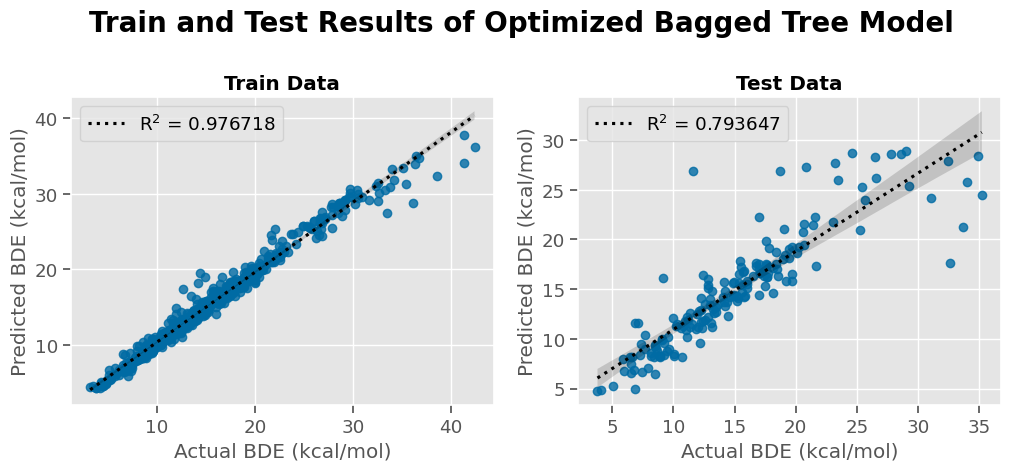

In [68]:
train_test_plot('Optimized Bagged Tree Model', bt_opt)
#plt.savefig('bt_opt.png')

## Evaluvation of optimized models

In [69]:
model = ['XG Boost','Random Forest', 'Bagged Tree']
pipe = [xgb_opt, rf_opt, bt_opt]
final_eval_results = pd.DataFrame(columns = ['Model','Train R2', 'Test R2', 'Train RMSE (kcal/mol)', 'Test RMSE (kcal/mol)'])

for i in range(len(model)):
  final_eval_results.loc[i, 'Model'] = model[i]
  final_eval_results.loc[i,'Train R2'], final_eval_results.loc[i,'Test R2'], final_eval_results.loc[i,'Train RMSE (kcal/mol)'], final_eval_results.loc[i,'Test RMSE (kcal/mol)'] = eval_model_final(pipe[i])

Text(0.5, 1.0, 'Performance of optimized models ')

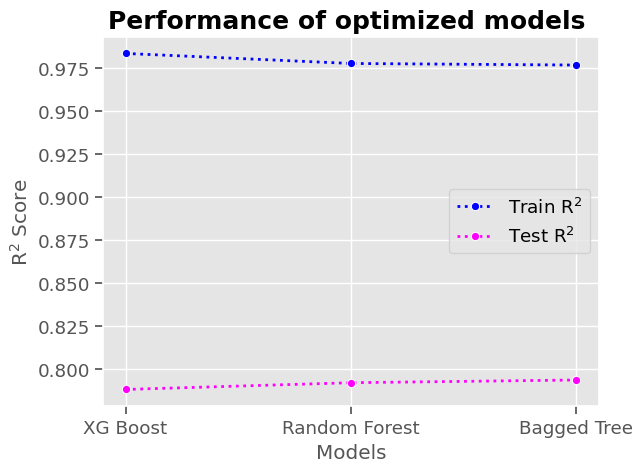

In [70]:
sns.lineplot(data = final_eval_results, x = 'Model', y= 'Train R2', 
             ls = ':', marker = 'o', label = 'Train R$^2$', lw = 2, color = 'blue' )
sns.lineplot(data = final_eval_results, x = 'Model', y= 'Test R2', 
             ls = ':', marker = 'o', label = 'Test R$^2$', lw = 2, color = 'magenta' )
plt.ylabel('R$^2$ Score')
plt.xlabel('Models')
plt.title('Performance of optimized models ', fontsize = 18, fontweight = 'bold')


Text(0.5, 1.0, 'Performance of optimized models ')

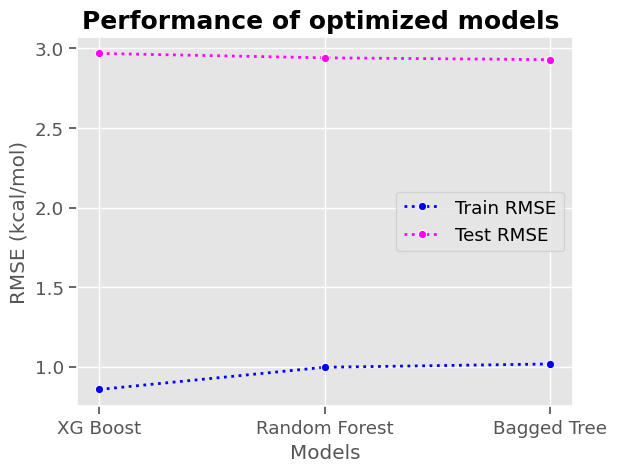

In [71]:
sns.lineplot(data = final_eval_results, x = 'Model', y= 'Train RMSE (kcal/mol)', 
             ls = ':', marker = 'o', label = 'Train RMSE', lw = 2, color = 'blue')
sns.lineplot(data = final_eval_results, x = 'Model', y= 'Test RMSE (kcal/mol)', 
             ls = ':', marker = 'o', label = 'Test RMSE', lw = 2, color = 'magenta')
plt.ylabel('RMSE (kcal/mol)')
plt.xlabel('Models')
plt.title('Performance of optimized models ', fontsize = 18, fontweight = 'bold')


In [72]:
final_eval_results.set_index('Model', inplace = True) 
final_eval_results

,Train R2,Test R2,Train RMSE (kcal/mol),Test RMSE (kcal/mol)
Model,,,,
XG Boost,0.983465,0.788153,0.857586,2.968263
Random Forest,0.977642,0.79207,0.997209,2.940696
Bagged Tree,0.976718,0.793647,1.017628,2.929521
